In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

## Preprocessing on base_db

In [24]:
base_db = pd.read_csv('output/base_db_smiles.csv')

In [25]:
base_db.columns

Index(['Unnamed: 0', 'test_cas', 'exposure_type', 'obs_duration_mean',
       'conc1_type', 'conc1_mean', 'class', 'tax_order', 'family', 'genus',
       'species', 'organism_lifestage', 'organism_characteristics',
       'ecotox_group', 'smiles', 'atom_number', 'bonds_number', 'ring_numer',
       'Mol', 'MorganDensity', 'LogP'],
      dtype='object')

In [26]:
use_db = base_db.copy()
use_db = use_db[['test_cas', 'exposure_type', 'obs_duration_mean', 'conc1_type',
       'conc1_mean', 'class', 'tax_order', 'family', 'genus', 'species','atom_number', 'bonds_number', 'ring_numer',
       'Mol', 'MorganDensity', 'LogP']]

In [27]:
use_db.describe()

,obs_duration_mean,conc1_mean,atom_number,bonds_number,ring_numer,Mol,MorganDensity,LogP
count,53652.000000,5.365200e+04,53180.000000,53180.000000,53180.000000,53180.000000,53180.000000,53180.000000
mean,62.374569,3.434474e+02,13.589921,13.224878,1.097499,244.474903,1.071260,1.278474
std,41.768157,6.691841e+03,9.188111,10.412063,1.358434,132.967880,0.323409,3.678951
min,0.004000,5.200000e-08,1.000000,0.000000,0.000000,9.012000,0.200000,-24.338100
25%,24.000000,1.700000e-01,6.000000,4.000000,0.000000,159.609000,0.842105,-0.784780
50%,48.000000,2.180000e+00,13.000000,13.000000,1.000000,228.679000,1.111111,2.121800
75%,96.000000,2.210000e+01,19.000000,19.000000,2.000000,326.437000,1.272727,3.689800
max,964.000000,9.860000e+05,123.000000,135.000000,14.000000,1736.185000,2.000000,13.789100


### obs_duration_mean/conc1_mean

In [28]:
# logarithmic transformations
use_db.obs_duration_mean = use_db.obs_duration_mean.apply(lambda x: np.log1p(x))
#use_db.conc1_mean = use_db.conc1_mean.apply(lambda x: np.log1p(x)) #Not good result

In [29]:
# MinMax scale
minmax = MinMaxScaler()
minmax.fit(use_db[["obs_duration_mean"]])
use_db[["obs_duration_mean"]] = minmax.transform(use_db[["obs_duration_mean"]])

In [30]:
use_db.describe()

,obs_duration_mean,conc1_mean,atom_number,bonds_number,ring_numer,Mol,MorganDensity,LogP
count,53652.000000,5.365200e+04,53180.000000,53180.000000,53180.000000,53180.000000,53180.000000,53180.000000
mean,0.562448,3.434474e+02,13.589921,13.224878,1.097499,244.474903,1.071260,1.278474
std,0.129108,6.691841e+03,9.188111,10.412063,1.358434,132.967880,0.323409,3.678951
min,0.000000,5.200000e-08,1.000000,0.000000,0.000000,9.012000,0.200000,-24.338100
25%,0.468087,1.700000e-01,6.000000,4.000000,0.000000,159.609000,0.842105,-0.784780
50%,0.566067,2.180000e+00,13.000000,13.000000,1.000000,228.679000,1.111111,2.121800
75%,0.665496,2.210000e+01,19.000000,19.000000,2.000000,326.437000,1.272727,3.689800
max,1.000000,9.860000e+05,123.000000,135.000000,14.000000,1736.185000,2.000000,13.789100


In [31]:
# standardization
scaler = StandardScaler()
scaler.fit(use_db[["obs_duration_mean"]])
use_db[["obs_duration_mean"]] = scaler.transform(use_db[["obs_duration_mean"]])

## Atom Number

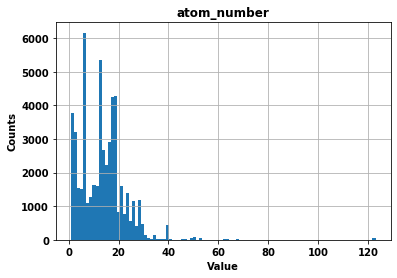

In [32]:
# plotted as before
use_db.atom_number.hist(bins=100)
plt.title("atom_number")
plt.xlabel("Value")
plt.ylabel("Counts");

We decided to scale by both a logarithmic transformations ans a MinMax scale

In [33]:
# logarithmic transformations
use_db.atom_number = use_db.atom_number.apply(lambda x: np.log1p(x))
# MinMax scale
minmax = MinMaxScaler()
minmax.fit(use_db[["atom_number"]])
use_db[["atom_number"]] = minmax.transform(use_db[["atom_number"]])

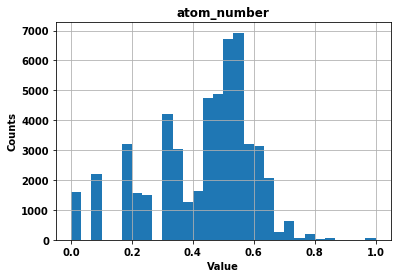

In [34]:
# plotted as before
use_db.atom_number.hist(bins=30)
plt.title("atom_number")
plt.xlabel("Value")
plt.ylabel("Counts");

## Bonds Number

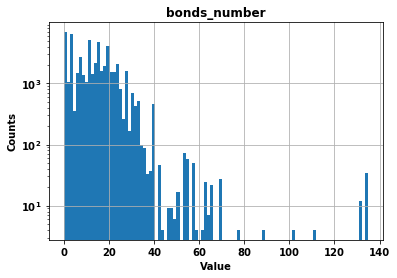

In [35]:
# plotted as before
use_db.bonds_number.hist(bins=100)
plt.yscale("log")
plt.title("bonds_number")
plt.xlabel("Value")
plt.ylabel("Counts");

We decided to scale by both a logarithmic transformations ans a MinMax scale

In [36]:
# logarithmic transformations
use_db.bonds_number = use_db.bonds_number.apply(lambda x: np.log1p(x))
# MinMax scale
minmax = MinMaxScaler()
minmax.fit(use_db[["bonds_number"]])
use_db[["bonds_number"]] = minmax.transform(use_db[["bonds_number"]])

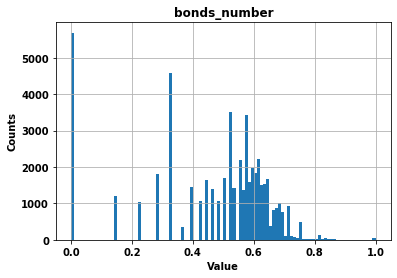

In [37]:
use_db.bonds_number.hist(bins=100)
plt.title("bonds_number")
plt.xlabel("Value")
plt.ylabel("Counts");

## Rings number

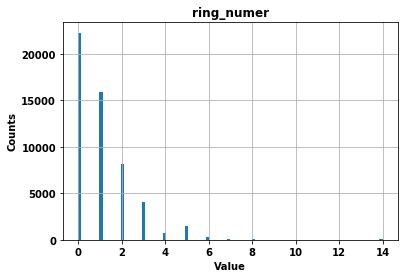

In [38]:
# plotted as before
use_db.ring_numer.hist(bins=100)
#plt.yscale("log")
plt.title("ring_numer")
plt.xlabel("Value")
plt.ylabel("Counts");

We assume this as a categrical features and we don't change it

## Mol

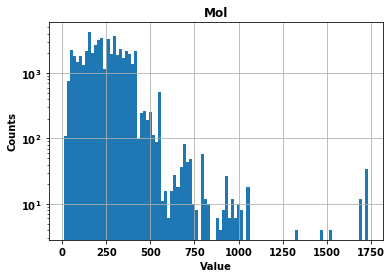

In [39]:
# plotted as before
use_db.Mol.hist(bins=100)
plt.yscale("log")
plt.title("Mol")
plt.xlabel("Value")
plt.ylabel("Counts");

We only this to scale the range of this variable

In [40]:
# MinMax scale
minmax = MinMaxScaler()
minmax.fit(use_db[["Mol"]])
use_db[["Mol"]] = minmax.transform(use_db[["Mol"]])

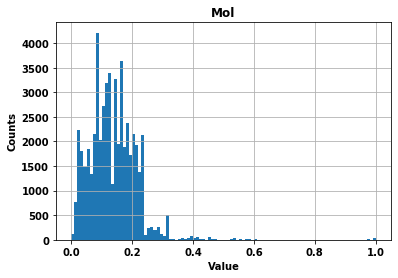

In [41]:
# plotted as before
use_db.Mol.hist(bins=100)
plt.title("Mol")
plt.xlabel("Value")
plt.ylabel("Counts");

## Morgan Density

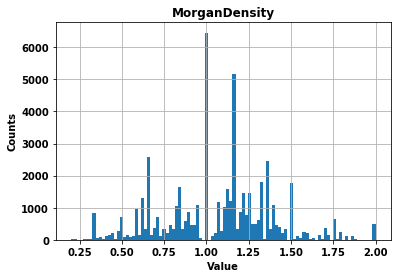

In [42]:
# plotted as before
use_db.MorganDensity.hist(bins=100)
#plt.yscale("log")
plt.title("MorganDensity")
plt.xlabel("Value")
plt.ylabel("Counts");

We keeo this untouch

## LogP

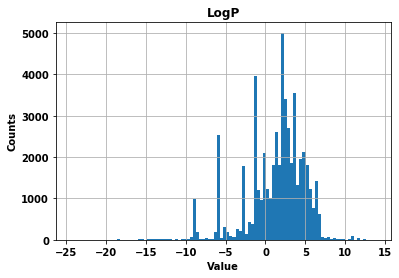

In [43]:
# plotted as before
use_db.LogP.hist(bins=100)
plt.title("LogP")
plt.xlabel("Value")
plt.ylabel("Counts");

In [44]:
use_db.to_csv("output/db_smiles_preproc.csv")